In [1]:
# Move to the directory where the notebook is located
# and set directory to Deep_Learning-Based_Signature_Forgery_Detection_for_Personal_Identity_Authentication
%cd ..

c:\Users\duong\Downloads\Deep_Learning-Based_Signature_Forgery_Detection_for_Personal_Identity_Authentication


C:\Users\duong\AppData\Roaming\Python\Python313\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import os
print(os.getcwd())

c:\Users\duong\Downloads\Deep_Learning-Based_Signature_Forgery_Detection_for_Personal_Identity_Authentication


# Model information

In [3]:
# Đảm bảo đang ở Deep_Learning-Based_Signature_Forgery_Detection_for_Personal_Identity_Authentication
# Cài đặt package
!pip install -e .

Obtaining file:///C:/Users/duong/Downloads/Deep_Learning-Based_Signature_Forgery_Detection_for_Personal_Identity_Authentication
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
  Preparing editable metadata (pyproject.toml): finished with status 'done'
  Building editable for signature_verification (pyproject.toml): started
  Building editable for signature_verification (pyproject.toml): finished with status 'done'
  Created wheel for signature_verification: filename=signature_verification-0.1.0-0.editable-py3-none-any.whl size=3195 sha256=e43195bd8aabaa572c86dc9f1d45fe46949bde9ec4d65e6b9924ecf74003f2b9
  Stored in direct


[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Import module
from utils.helpers import load_config,get_model_from_Kaggle,load_model
print("Package installed and imported successfully!")

Package installed and imported successfully!


In [5]:
#Config information
config = load_config('configs/config_siamese.yaml')
print(config)

{'model': {'name': 'siamese', 'backbone': 'resnet18', 'feature_dim': 512, 'kaggle_handle': 'giahuytranviet/siamese-verification-model/pyTorch/default'}, 'training': {'batch_size': 32, 'learning_rate': 0.001, 'optimizer': 'adam', 'num_epochs': 50, 'margin': 0.5, 'scheduler': 'cosine'}, 'dataset': {'original_data_path': None, 'forgeries_data_path': None, 'input_size': [220, 150]}, 'device': 'cuda', 'logging': {'log_dir': './logs/', 'checkpoint_dir': './checkpoints/', 'save_freq': 5}}


In [6]:
model_path = get_model_from_Kaggle(config['model']['kaggle_handle'])

Model downloaded to C:\Users\duong\.cache\kagglehub\models\giahuytranviet\siamese-verification-model\pyTorch\default\1


In [7]:
#Model information
model = load_model(model_path, config['model']['backbone'],config['model']['feature_dim'],config['model']['name'])

print(model)  # Print the model architecture
print("Tổng số tham số:", sum(p.numel() for p in model.parameters()))

c:\Users\duong\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\duong\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Model loaded successfully
Model loaded from C:\Users\duong\.cache\kagglehub\models\giahuytranviet\siamese-verification-model\pyTorch\default\1
SiameseNetwork(
  (feature_extractor): ResNetFeatureExtractor(
    (backbone): ResNet(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_ru

# Test Model

## Data import

In [10]:
import kagglehub

In [16]:
pathA = kagglehub.dataset_download("divyanshrai/handwritten-signatures")
print("Path to dataset files [divyanshrai]:", pathA) #dataset A

100%|██████████| 370M/370M [00:15<00:00, 24.9MB/s] 

Extracting files...


Path to dataset files [divyanshrai]: C:\Users\duong\.cache\kagglehub\datasets\divyanshrai\handwritten-signatures\versions\2


In [12]:
pathB = kagglehub.dataset_download("sureshpokharel444/handwritten-signatures")
print("Path to dataset files [sureshpokharel444]:", pathB) #dataset B

Path to dataset files [sureshpokharel444]: C:\Users\duong\.cache\kagglehub\datasets\sureshpokharel444\handwritten-signatures\versions\1


## Preprocess Data Name

In [56]:
folder_path = r'C:\Users\duong\.cache\kagglehub\datasets\divyanshrai\handwritten-signatures\versions\2\sample_Signature\sample_Signature\forged'

In [ ]:
class preprocessor(str):
    def __init__(self, path):
        self.path = path

    def _rename_file(self, filename):
        id1 = int(filename[4:7]) # str - 3 chữ số đầu xxx
        id2 = int(filename[7:9]) # str - 2 chữ số giữa yy
        
        if 'forged' in self.path:
            new_name = f"forgeries_{id1}_{id3}.png"
        
        elif 'genuine' in self.path:
            new_name = f"original_{id1}_{id2}.png"

        return new_name

    def do_rename(self):
        files = os.listdir(self.path)

        files = sorted(os.listdir(self.path)) 
        # Đổi tên các file trong thư mục
        for file in files:
            # Đổi tên các file
            new_file = self._rename_file(file)

            old_path = os.path.join(self.path, file)
            new_path = os.path.join(self.path, new_file)

            print(f"Đổi {file} → {new_file}")
            os.rename(old_path, new_path)

In [ ]:
test = preprocessor(folder_path)
test.do_rename()

Đổi NFI-00101014.png → forgeries_1_1.png
Đổi NFI-00101019.png → forgeries_1_1.png


FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\duong\\.cache\\kagglehub\\datasets\\divyanshrai\\handwritten-signatures\\versions\\2\\sample_Signature\\sample_Signature\\forged\\NFI-00101019.png' -> 'C:\\Users\\duong\\.cache\\kagglehub\\datasets\\divyanshrai\\handwritten-signatures\\versions\\2\\sample_Signature\\sample_Signature\\forged\\forgeries_1_1.png'

## Statistics  & Model import

In [8]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import roc_auc_score

In [9]:
from losses.contrastive_loss import ContrastiveLoss
from models.siamese_network import SiameseNetwork
from datasets.siamese_dataloader import SiameseSignatureDataset

## Prepare Data

In [41]:
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn.functional as F
import torch
import random
import numpy as np
from torch.utils.data import DataLoader

seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [ ]:
# Transform chung
transform = transforms.Compose([
    transforms.Resize((220, 150)),
    transforms.Grayscale(),  # Đảm bảo ảnh 1 kênh
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.repeat(3, 1, 1)),  # 1 kênh -> 3 kênh
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Tạo dataset
siamese_test_set = SiameseSignatureDataset(
    org_dir=r'C:\Users\duong\.cache\kagglehub\datasets\divyanshrai\handwritten-signatures\versions\2\sample_Signature\sample_Signature\genuine',
    forg_dir=r'C:\Users\duong\.cache\kagglehub\datasets\divyanshrai\handwritten-signatures\versions\2\sample_Signature\sample_Signature\forged',
    transform=transform
)

siamese_test_loader = DataLoader(siamese_test_set, num_workers=0, batch_size=32, shuffle=True)

In [33]:
# Kiểm tra Siamese Dataset
print(f"Siamese Dataset - Total pairs: {len(siamese_test_set)}")
sample_pair, label = siamese_test_set[0]
print(f"Pair shape: {sample_pair[0].shape}, {sample_pair[1].shape}")
print(f"Label: {label}")

Siamese Dataset - Total pairs: 179
Pair shape: torch.Size([3, 220, 150]), torch.Size([3, 220, 150])
Label: 1.0


In [38]:
model_path = r"C:\Users\duong\.cache\kagglehub\models\giahuytranviet\siamese-verification-model\pyTorch\default\1"
model = load_model(model_path, config['model']['backbone'], config['model']['feature_dim'], "siamese") #backbone = resnet18 - feature_dim = 512

device = torch.device(config['device'] if torch.cuda.is_available() else "cpu")
model.to(device)
if torch.cuda.device_count() > 1:
    print(f"Using {torch.cuda.device_count()} GPUs")
    model = torch.nn.DataParallel(model, device_ids=[0, 1])

model.eval()

Model loaded successfully
Model loaded from C:\Users\duong\.cache\kagglehub\models\giahuytranviet\siamese-verification-model\pyTorch\default\1


SiameseNetwork(
  (feature_extractor): ResNetFeatureExtractor(
    (backbone): ResNet(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=

In [ ]:
all_distances = ()
all_labels = ()

with torch.no_grad():
    for (img1, img2), label in siamese_test_loader:
        img1, img2 = img1.to(device), img2.to(device)
        output1, output2 = model(img1, img2)

        distances = F.pairwise_distance(output1, output2)
        print("Khoảng cách:", distances) ### khoảng cách in ra là số
        all_distances.extend(distances.cpu().numpy())
        all_labels.extend(label.numpy())

Khoảng cách: tensor([0.5559, 0.4519, 0.2252, 0.3887, 0.2746, 0.9726, 0.6473, 0.3838, 0.3247,
        0.1069, 0.7071, 0.3484, 0.7487, 0.2214, 0.3870, 0.1550, 0.4340, 1.2445,
        0.6328, 0.0842, 0.5051, 0.3737, 0.8275, 0.4886, 0.2731, 0.4684, 0.3836,
        0.6882, 0.3670, 0.4179, 0.5287, 0.5962])
Khoảng cách: tensor([2.2627e-05, 6.3034e-01, 4.3412e-01, 5.3273e-01, 1.1494e+00, 5.9203e-01,
        3.4854e-01, 4.1424e-01, 3.6325e-01, 9.4809e-01, 7.6273e-01, 2.5011e-01,
        2.8676e-01, 2.1396e-01, 2.5090e-01, 4.3132e-01, 3.5386e-01, 3.8875e-01,
        1.7226e-01, 8.0998e-01, 6.8088e-01, 4.0247e-01, 8.4618e-01, 9.1808e-01,
        3.0372e-01, 5.3919e-01, 2.3753e-01, 2.1790e-01, 2.1957e-01, 2.3608e-01,
        3.3974e-01, 9.1963e-01])
Khoảng cách: tensor([3.8881e-01, 9.3265e-01, 6.8856e-01, 5.9113e-01, 5.1029e-01, 9.2941e-01,
        3.0484e-01, 3.2496e-01, 2.5292e-01, 2.2627e-05, 2.2066e-01, 3.5902e-01,
        4.0340e-01, 1.7728e-01, 3.9475e-01, 1.2691e-01, 4.6844e-01, 3.4562e-01,

In [ ]:
threshold = config['training']['margin']  # có thể điều chỉnh tùy tập dữ liệu
y_pred = [1 if d < threshold else 0 for d in all_distances]

accuracy = accuracy_score(all_labels, y_pred) ### acc bị sai 
auc = roc_auc_score(all_labels, -np.array(all_distances))  # đảo dấu để khoảng cách thấp = giống

print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc:.4f}")

Accuracy: 0.4693
AUC: 0.4671


## Visualization

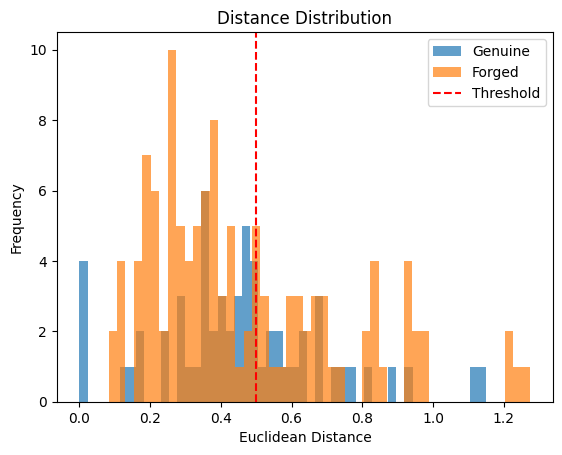

In [50]:
import matplotlib.pyplot as plt

genuine = [d for d, l in zip(all_distances, all_labels) if l == 1]
forged = [d for d, l in zip(all_distances, all_labels) if l == 0]

plt.hist(genuine, bins=50, alpha=0.7, label='Genuine')
plt.hist(forged, bins=50, alpha=0.7, label='Forged')
plt.axvline(threshold, color='red', linestyle='--', label='Threshold')
plt.legend()
plt.title('Distance Distribution')
plt.xlabel('Euclidean Distance')
plt.ylabel('Frequency')
plt.show()